## 1 consumer complaint classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from io import StringIO
import seaborn as sns

In [2]:
df = pd.read_csv("../data/consumer_complaints.csv/consumer_complaints.csv")
df.head(2)

/home/harsha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080


In [3]:
df = df[['product', 'consumer_complaint_narrative']]

df = df[pd.notnull(df['consumer_complaint_narrative']) ]
df.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [4]:
# factorizing the category columns
df['category_id'] = df['product'].factorize()[0]
df.head()

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [5]:
# Check the distriution of complaints by category
df.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

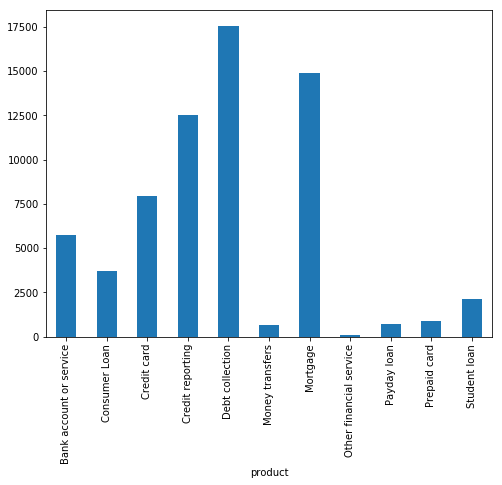

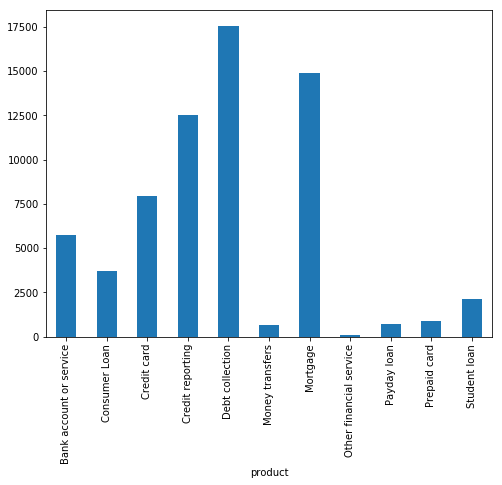

In [7]:
# lets plot it and see
fig = plt.figure( figsize=(8,6) )
df.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [8]:
# splitting data

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['consumer_complaint_narrative'], df['product'])


In [13]:
# create TF-IDF vectors 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['consumer_complaint_narrative'])

xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [14]:
# model building and avaluation

model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

# Model summary
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class="ovr", n_jobs=1,
          penalty='l2', random_state=None, solver="liblinear", tol=0.0001,
          verbose=0, warm_start=False)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# Checking accuracy
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf), valid_y)
print ("Accuracy: ", accuracy)

Accuracy:  0.8428331936295055


In [17]:
# Classification report
print(metrics.classification_report(valid_y, model.predict(xvalid_tfidf),target_names=df['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.82      0.80      0.81      1429
          Consumer Loan       0.79      0.56      0.65       896
               Mortgage       0.80      0.80      0.80      1970
            Credit card       0.84      0.86      0.85      3156
       Credit reporting       0.82      0.89      0.85      4402
           Student loan       0.87      0.45      0.60       168
Bank account or service       0.91      0.96      0.93      3745
            Payday loan       0.00      0.00      0.00        24
        Money transfers       0.76      0.21      0.33       183
Other financial service       0.82      0.60      0.69       211
           Prepaid card       0.88      0.75      0.81       518

            avg / total       0.84      0.84      0.84     16702



/home/harsha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:

# Prediction example
texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]

In [21]:
from sklearn.metrics import confusion_matrix


#confusion matrix
conf_mat = confusion_matrix(valid_y, model.predict(xvalid_tfidf))

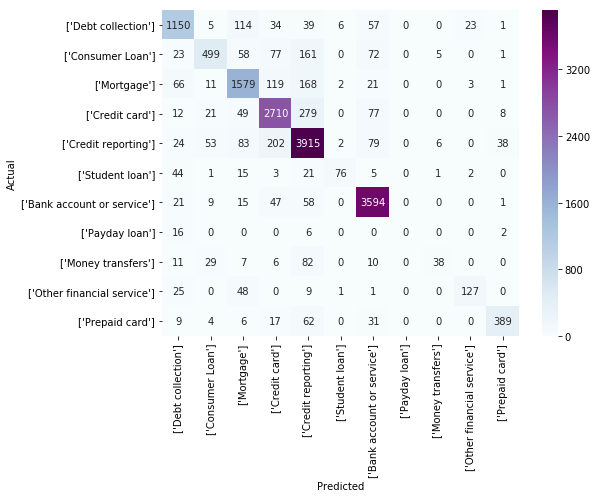

In [23]:
# Vizualizing confusion matrix
category_id_df = df[['product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product']].values)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",
            xticklabels=category_id_df[['product']].values, yticklabels=category_id_df[['product']].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
# Prediction example
texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]


In [25]:
text_features = tfidf_vect.transform(texts)
predictions = model.predict(text_features)
print(texts)
print("  - Predicted as: '{}'".format(id_to_category[predictions[0]]))

['This company refuses to provide me verification and validation of debtper my right under the FDCPA. I do not believe this debt is mine.']
  - Predicted as: 'Credit reporting'


#### test with Random Forest, SVM, GBM, Neural Networks, Naive Bayes.

## 2 Implementing Sentiment Analysis

#### best way to implement using TextBlob or vaderSentiment library

In [66]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df = pd.read_csv("../data/amazon-fine-food-reviews/Reviews.csv")
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568428 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [69]:
df['Summary'].head(3)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
Name: Summary, dtype: object

In [70]:
df['Text'].head(3)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
Name: Text, dtype: object

In [71]:
# text preprocessing
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [72]:
# Lower casing and removing punctuations
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',"" )
df['Text'].head()

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [73]:
# Removal of stop words
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [75]:
# spelling correction
#df['Text'] = df['Text'].apply( lambda x: str(TextBlob(x).correct() ))
df['Text'].head(2)


0    boughtseveralvitalitycanneddogfoodproductfound...
1    productarrivedlabeledjumbosaltedpeanutsthepean...
Name: Text, dtype: object

In [74]:
# lemmatization
df['Text'] = df['Text'].apply( lambda x: "".join( [Word(word).lemmatize() for word in x.split() ] ))
df['Text'].head(2)

0    boughtseveralvitalitycanneddogfoodproductfound...
1    productarrivedlabeledjumbosaltedpeanutsthepean...
Name: Text, dtype: object